<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: _______</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


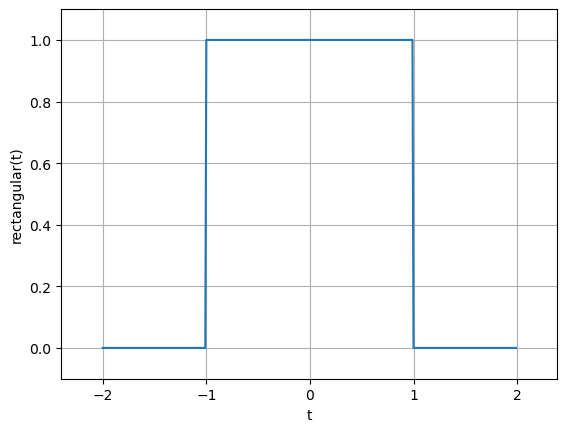

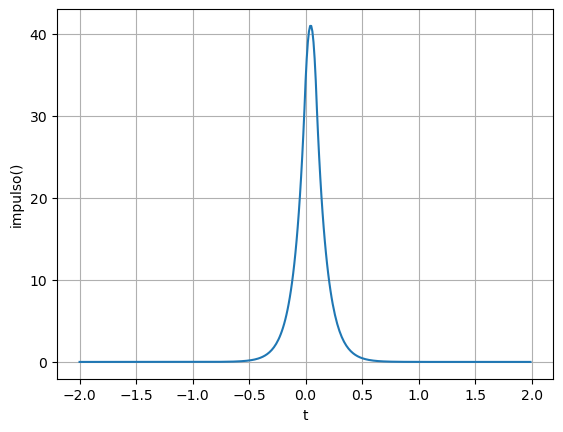

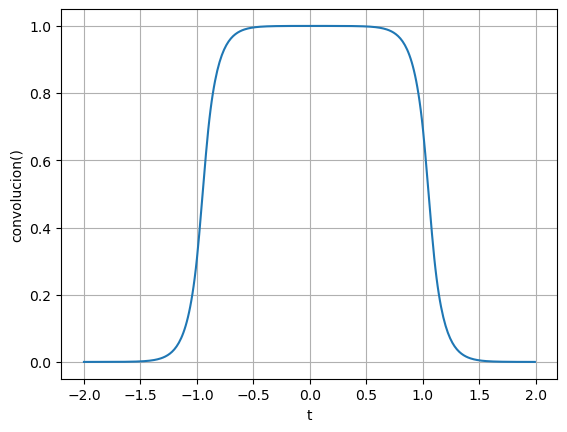

In [10]:
from scipy import signal 
import numpy as np
import matplotlib.pyplot as plt
#Se define la funcion escalon
u = lambda t: np.heaviside(t,1)

ti  = np.arange(-2, 2, 0.01)

#Se crea la señal rectangula

u2 = lambda t: u(t+1)
u4 = lambda t: u(t-1)
rectangular = lambda t:u2(t) - u4(t)
rect_i = rectangular(ti)
#Grafico funcion rectangular
plt.figure(3)
plt.plot(ti,rect_i)
plt.xlabel('t')
plt.ylabel('rectangular(t)')
plt.margins(0.1)
plt.grid()
plt.show()

#Se crea el impulso
impulso = lambda t,dt: u(t)-u(t-dt)
impulso_i = impulso(ti,0.1)
#Se filtra este impulso
impf=signal.symiirorder1(impulso_i,1,0.9)
#se Realiza la combolucion
conv=signal.convolve(rect_i, impf, mode='same') / sum(impf)

# Grafico impulso filtado

plt.plot(ti,impf)
plt.xlabel('t')
plt.ylabel('impulso()')
plt.grid()
plt.show()

#Grafico convolucion

plt.plot(ti,conv)
plt.xlabel('t')
plt.ylabel('convolucion()')
plt.grid()
plt.show()



## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


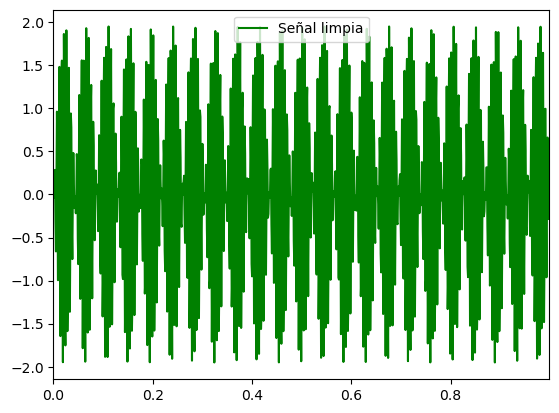

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Se crea una señal
dt=0.001
t=np.arange(0,1,dt)
f=np.sin(2*np.pi*1200*t)+np.sin(2*np.pi*777*t)
#Se agrega ruido a la señal



plt.plot(t,f,color='g',label='Señal limpia')
plt.xlim(t[0],t[-1])
plt.legend()

#Fast furier transform

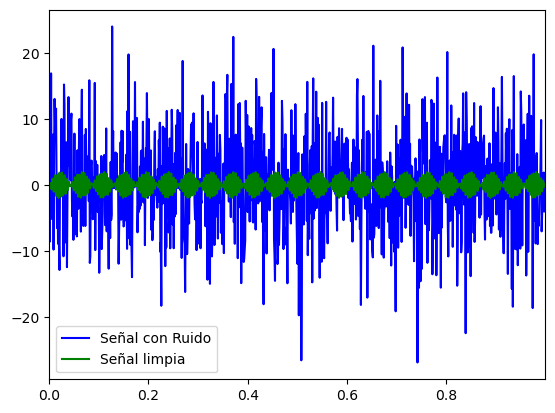

In [5]:
#Se agrega ruido a la señal
f0=f
f=f0+7*np.random.randn(len(t))
plt.plot(t,f,color='b',label='Señal con Ruido')
plt.plot(t,f0,color='g',label='Señal limpia')

plt.xlim(t[0],t[-1])
plt.legend()


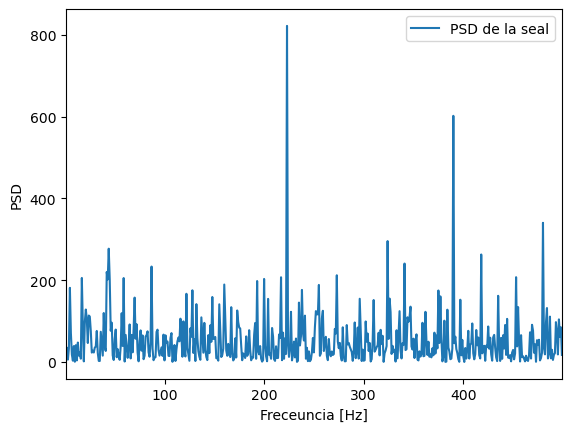

In [9]:
# se sacara la transformada de furier para ver si respuesta en frecuencia y crear el filtro
n=len(t)
ft=np.fft.fft(f,n)
PSD= ft*np.conj(ft)/n #Power spectrum
freq=(1/(dt*n))*np.arange(n) #
L=np.arange(1, np.floor(n/2),dtype='int')

plt.plot(freq[L],PSD[L],label='PSD de la seal')
plt.xlabel('Freceuncia [Hz]')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.ylabel('PSD')
plt.show()

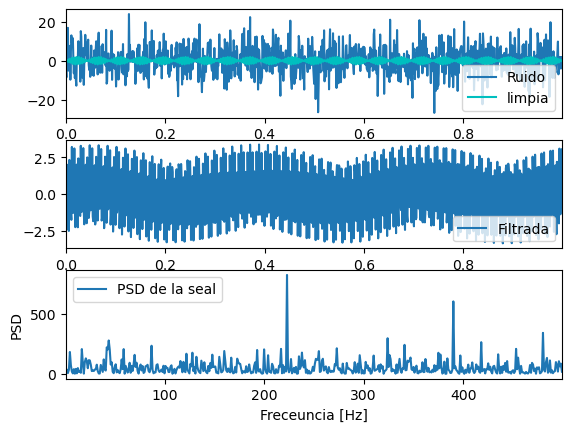

In [23]:
#Se filtra el PSD de todo el ruido
indices=PSD>450
PSDLimpio= PSD*indices
ft=indices*ft
ffilt=np.fft.ifft(ft)

fig,axs=plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,label='Ruido')
plt.plot(t,f0,color='c',label='limpia')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,label='Filtrada')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],label='PSD de la seal')
plt.xlabel('Freceuncia [Hz]')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.ylabel('PSD')

plt.show()

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


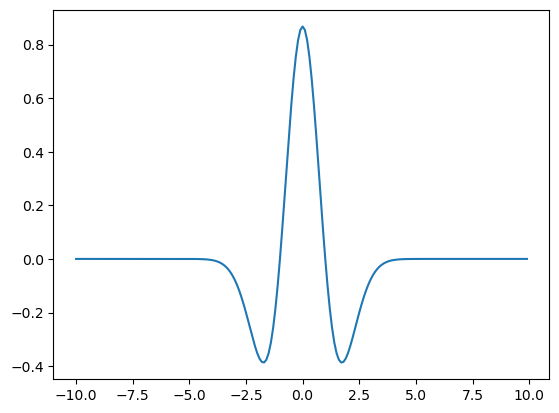

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    return 2 / (np.sqrt(3 * sigma) * np.pi**0.25) * (1 - x**2 / sigma**2) * np.exp(-x**2 / (2 * sigma**2) )

xvals = np.arange(-10,10,0.1)
plt.plot(xvals, mexican_hat(xvals, 0, 1))
plt.show()

In [34]:
#Se crea una señal
dt=0.001
t=np.arange(0,1,dt)
f=np.sin(2*np.pi*1200*t)+np.sin(2*np.pi*777*t)
#Se agrega ruido a la señal

n=len(t)
ft=np.fft.fft(f,n)
PSD= ft*np.conj(ft)/n #Power spectrum
freq=(1/(dt*n))*np.arange(n) #
L=np.arange(1, np.floor(n/2),dtype='int')


def fourier_w(signal, window_size=1000):
    out = np.zeros((len(signal),window_size))
    window = mexican_hat(window_size)
    for i in range(window_size//2, len(signal)-window_size//2):
        s = i - window_size//2
        e = s + window_size
        wsig = signal[s:e] * window
        out[i,:] = np.abs(np.fft.fft(wsig))
    return out



### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$. 

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle

In [ ]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

### 3.2.2 completa el siguiente código para realizar la transformada


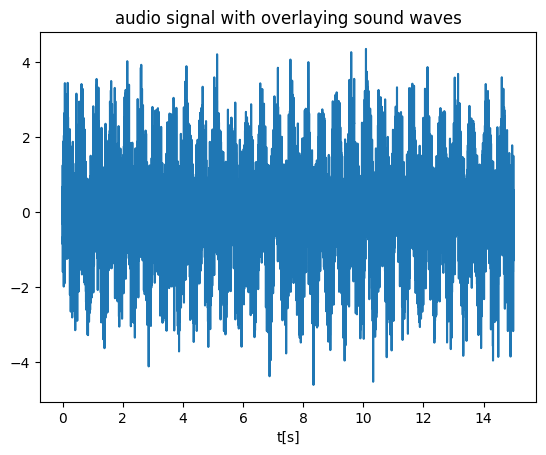

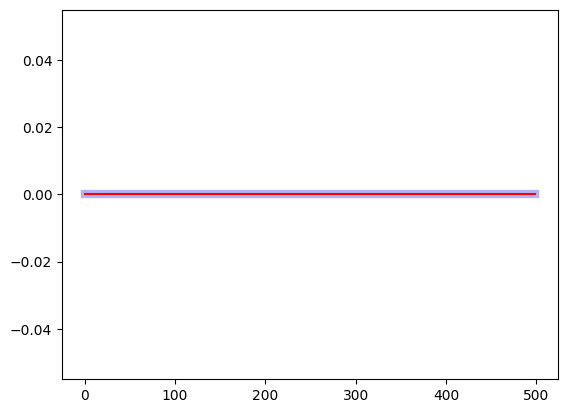

In [6]:

"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    f_scaled = 0
    transform_scaled =  0
    return transform_scaled

"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    pmn = 0
    transform = 0
    return transform


m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño. 

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia. 
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.